Please fill in your name and that of your teammate.

You: Amine CHARFEDDINE

Teammate: Delil DAG

# Introduction

Welcome to the seventh lab. After learning about SVMs last week, we finally introduce the _kernel trick_ and make them capable of tackling nonlinear data. We also introduced more generally the concept of _function mapping_ and learned a bit about word embeddings.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Function Mappings

#### 1.1 **[3pt]** Give an _original_ example for each of the following concepts (i.e. not one that you find in the slides!):

1. Mapping from an example data type to a decision space
2. Inverse mapping
3. Mapping from the example data to two destination feature spaces
4. Mapping from the two feature spaces above to a decision space

For example (here is what we presented in the slides):

1. Given a picture, decide if it represents an apple or an orange. Original space: 
$64\times64\times3$ images; destination space: $\{$apple, orange$\}$.
2. Given the label apple, map it to a $64\times64\times3$ picture of the fruit.
3. Map $\Phi_1$ goes from the picture to an estimate of average color; map $\Phi_2$ goes from the picture to a fruit width measured in pixels.
4. Map $\Phi_3$ goes from the two features of estimated color and fruit width, to the decision space of classifying the fruit as apple or orange.

1. Given a dataset of email attributes, map the email features to a decision space to determine if the email is spam or legitimate. Original space: features including email subject, body text, and sender information; destination space: $\{$spam, legitimate$\}$.
2. Given the label "spam", generate an email message containing spam content.
3. Given a dataset of houses, map $\Phi_1$ goes from the dataset of houses to the feature space A, which predicts the house price, while map $\Phi_2$ goes from the same dataset to feature space B, which predicts the likelihood of the house selling within a timeframe.
4. Map $\Phi_3$ goes from the two features spaces A and B of estimated price and selling probability, to the decision space for determining whether to purchase the house.

#### 1.2 **[1pt]** Explain advantages and disadvantages of Bag Of Words versus Word Embedding.

BoW is a simple approach where text is represented by the frequency of words. It's easy to understand because it counts how many times each word appears in a document. However, BoW doesn't consider the context or meaning of words, leading to a loss of semantic information. Additionally, the more the vocabulary size increases, the more the dimensionality of the BoW representation grows rapidly, which can make computations more challenging, especially for large datasets. <br>

On the other hand, Word Embeddings are vectors representing words in a continuous vector space. They capture well semantic relationships between words. This allows for a more nuanced understanding of word meanings and relationships, since similar words are represented by similar vectors. However, training high-quality word embeddings requires a large amount of data to capture different linguistic patterns accurately. Finally, Word Embeddings may inherit biases present in the training data.

#### 1.3 **[2pt]** Refer to the graph exemplifying Word Embedding in the slides, and its explanation. (i) What does it mean that the point representing Paris is close to the point representing Berlin? (ii) Why is the point for Paris closer to the point for France than to the point representing Italy?

(i) The fact that the point representing Paris is close to the point representing Berlin in the Word Embedding graph indicates that the words "Paris" and "Berlin" have similar semantic meanings or contexts. In other words, they are likely to occur in similar contexts within a given text, corpus or dataset. This closeness suggests that Paris and Berlin are related in some way, such as being capital cities of neighboring countries or sharing cultural or historical significance.

(ii) The point for Paris is closer to the point representing France than to the point representing Italy in the Word Embedding graph because "Paris" and "France" are more closely associated in terms of their semantic relationship. This closeness reflects the fact that Paris is the capital city of France and is thus closely linked to the country. On the other hand, while Italy is geographically close to France, the relationship between "Paris" and "Italy" may not be as strong in terms of semantic context (the capital city of Italy is Rome), leading to a greater distance between the two points in the Word Embedding space.

# 2. Kernels theory

#### 2.1 **[1pt]** Write the definition of kernel function (use latex).

$k(x, y) =  \langle \phi(x), \phi(y) \rangle $

#### 2.2 **[2pt]** Explain the kernel trick in English.

The kernel trick is a smart way to handle complex relationships between data points without doing high-dimensional transformations, which are very costly. Instead of working with the mapping function $\phi$ , a function called the kernel function calculates similarity between points in the original space. This enables efficient computation of dot products in higher dimensions without the need to compute actual coordinates. Therefore, it simplifies computations and captures nonlinear relationships effectively, and that is why it is a valuable tool in machine learning.

#### 2.3 **[1pt]** Explain in English the required properties of a Mercer kernel.

The first property, symmetry, means that the order in which you input the arguments does not matter : the output will remain the same. Meaning if you swap the order of the arguments ($x_1$ and $x_2$), the result of the kernel function doesn't change. Therefore, the kernel function will measure the similiraties between any pair of points in a consistent way.

The second property, positive definiteness, ensures that the output of the kernel function is always non-negative. It means that for any pair of points $x_1$ and $x_2$ in the space $X$, the value produced by the kernel function is greater than or equal to zero. The Gram matrix is positive semi-definite, indicating a positive relationship between the points.

#### 2.4 **[1pt]** Calculate by hand the linear kernel on points $\{[2,4], [1, -2]\}$.

The linear kernel can be denoted as : $ k(x_1,x_2) = x_1^\top x_2 $ <br>
Hence, in our case : $ k(x_1,x_2) = \begin{pmatrix} 2 \\ 4 \end{pmatrix}^\top \begin{pmatrix} 1 \\ -2 \end{pmatrix} = (2 \quad 4) \begin{pmatrix} 1 \\ -2 \end{pmatrix} = 2 \times 1 + 4 \times -2 = 2 - 8 = -6$ 

#### 2.5 **[1pt]** How do you compute the entry of the Gram matrix for row $i$ and column $j$ for a Gaussian kernel?

The entry of the Gram matrix $K_{ij}$ for row $i$ and column $j$ represents the value of the kernel function $k$ applied to the pair of data points $(x_i, x_j)$ : denoted by $k(x_i, x_j)$. This computation quantifies the similarity or relationship between the two data points based based on the kernel function we choose (linear, polynomial, Gaussian...). Here, in the case of the Gaussian kernel, the entry $K_{ij}$ is the result of applying the Gaussian function to the Euclidean distance between $x_i$ and $x_j$, scaled by the parameter $\gamma$, also written as : $k(x_1,x_2) = \exp\left(-\gamma \cdot ||x_1 - x_2||^2\right)$ for $\gamma > 0$.

#### 2.6 **[2pt]** Explain why does the Perceptron work with non-linearly separable data using Kernelization. Do you think Linear Regression would work with Kernelization? Explain your reasoning.

The Perceptron can handle non-linearly separable data using kernelization because it operates in a higher-dimensional feature space where data might become linearly separable. Kernelization allows the Perceptron to implicitly find a non-linear decision boundary by efficiently computing dot products in this space. <br>
However, Linear Regression may not benefit as much from kernelization because its objective remains to fit a linear model to the data, regardless of the dimensionality of the feature space. Kernelized Linear Regression might still result in a linear model, as it assumes a linear relationship between input features and the target variable. Therefore, even in the higher-dimensional feature space, the resulting model from kernelized Linear Regression may still be linear, which is not effective for capturing non-linear relationships between variables.

# 3. Kernels in practice

For simplicity, let's use once again a two-species adaptation of the Iris dataset. You can copy the code from the last assignment. This time though, to make it harder for linear classifiers let's separate the "central" species from the other two. This means that you should set label `versicolor` rather than `setosa` as class `-1`. I suggest you un-comment the `pairplot`s to verify it works.  
NOTE: all recommendation on how to handle and prepare the data from the past assignment(s) still hold. As do the warnings that using the wrong data sets will **invalidate the whole answer**.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


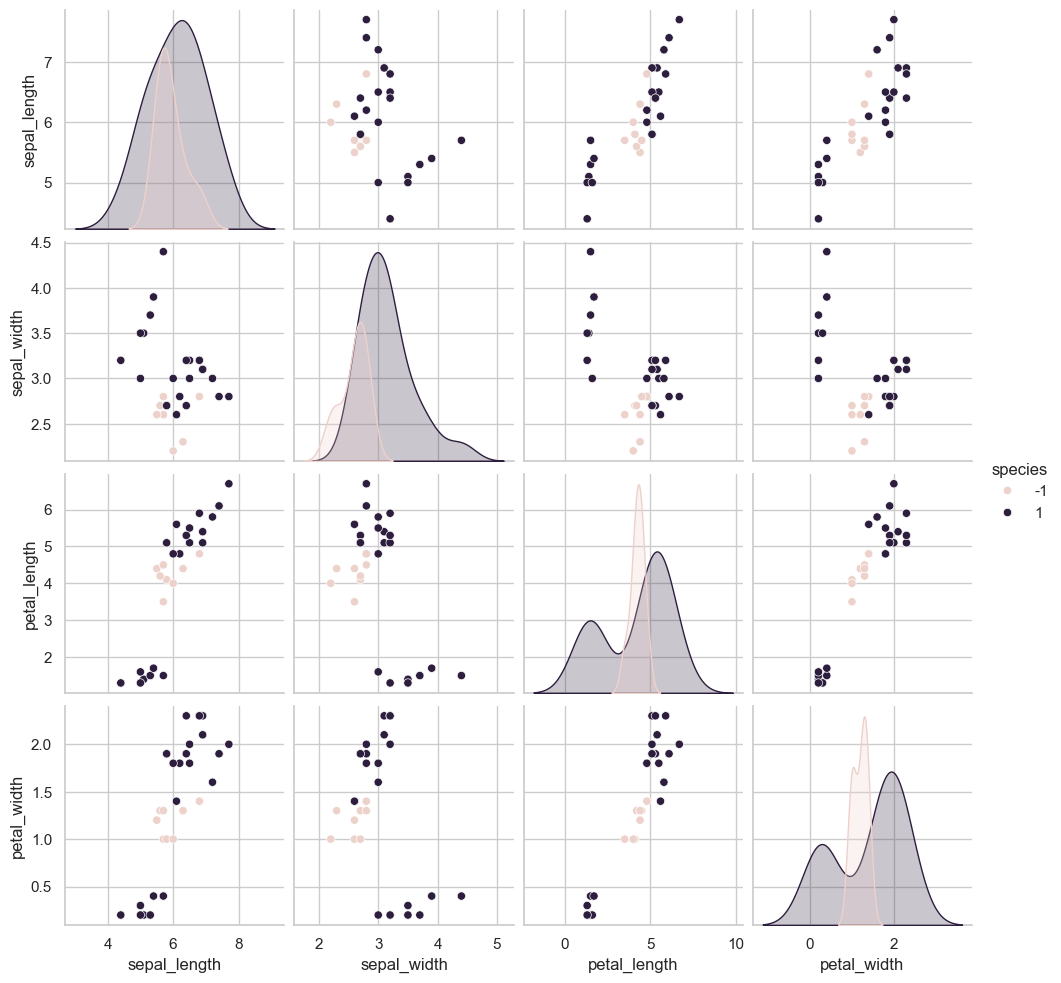

In [2]:
df = sns.load_dataset('iris')
# sns.pairplot(df, hue='species')

df.loc[df['species'] == 'versicolor', 'species'] = -1
df.loc[df['species'] != -1, 'species'] = 1
df['species'] = pd.to_numeric(df['species'])
print(df.dtypes)
# sns.pairplot(df, hue='species')

train, test = train_test_split(df, test_size=0.2) # 80-20 split
sns.pairplot(test, hue='species')

#### 3.1 **[2pt]** Train an SVM with linear kernel on the Iris data using Scikit-learn (this time you are required to use class `SVC`). Then do the same using a Gaussian kernel (still `SVC`) and compare the performance using its method `score()`.

- Remember to prepare inputs/labels for Scikit-learn; again the last assignment should help.
- Calling the method `score()` on the trained model just does the prediction and returns the percentage of correct answers. It is a useful function to learn to quickly check if your model is working.
- You expect the linear kernel to perform poorly. If the performance is close to the Gaussian kernel, it is possible that the test set was by chance not homogeneous. You can verify that by doing a pairplot on the test set, and if so just run the data loading and preparation again.
- No need to find an optimal value for `C` but pass it explicitly.

In [3]:
from sklearn.svm import SVC

X_train = train.drop(columns=['species']) # We separate the features and the target variable
y_train = train['species']
X_test = test.drop(columns=['species'])
y_test = test['species']

linear_svm = SVC(kernel='linear', C=1) # We train an SVM with linear kernel
linear_svm.fit(X_train, y_train)

gaussian_svm = SVC(kernel='rbf', C=1) # We train an SVM with Gaussian (RBF) kernel
gaussian_svm.fit(X_train, y_train)

linear_score = linear_svm.score(X_test, y_test) # We compare the performances using the score method
gaussian_score = gaussian_svm.score(X_test, y_test)

print("Linear SVM Score:", linear_score)
print("Gaussian SVM Score:", gaussian_score)

# sns.pairplot(test, hue='species')

Linear SVM Score: 0.7333333333333333
Gaussian SVM Score: 0.9333333333333333


#### 3.2 **[2pt]** Write a Python function that takes two data points and a value for `gamma` as input, and returns the Gaussian kernel of the points.

In [4]:
def gaussianKernel(x,y,gamma):
    assert gamma > 0, "Gamma must be a positive value."
    return(np.exp(-gamma*(np.linalg.norm(x-y))**2))

x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
gamma = 0.1
print(gaussianKernel(x1,x2,gamma))

0.06720551273974976


#### 3.3 **[3pt]** Write a Python function that takes two dataset (and a gamma) and returns their Gram matrix for a Gaussian kernel.

- You need two datasets because you need to compute the *train* matrix between the train and itself, but the *test* matrix between the test and the train.
- Simplest method:
    - Create a return matrix, initially empty, shaped size_of_A times size_of_B, with dtype 'float64'
    - Run two loops with indices (i, j) in ranges up to size_of_A and size_of_B
    - Compute the kernel between row i in A and row j in B, and place it in the return matrix at row i column j
- Careful with Pandas' `iterrows()`, as the "index" it returns is the DataFrame index (i.e. for use with `loc[]`), not the ordinal index (i.e. for `iloc[`). 
- Generating the matrix automatically is harder, as there is no straightforward way to compute an `outer` in numpy or pandas with a custom function.
- One way is to use `column_stack` https://stackoverflow.com/a/21759340 then apply the kernel defined above.
- Another is to use `ufunc.outer` http://folk.uio.no/inf3330/scripting/doc/python/NumPy/Numeric/numpy-7.html which is only defined for Universal Functions (`ufuncs`). Look at the examples for `outer`, you can re-implement the function above starting with `np.subtract.outer(A, B)`, which generates the matrix (but check the shape!), then you can run the other operations using broadcast. Both outers and universal functions are super useful, it's worth the effort of learning them, more [[here]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
- `pandas.apply()` along rows is also an option you should be able to consider with by now. The function name for `-` is `np.subtract` (which is an `ufunc`, see above).

Above all, remember the first rule of a good BDD engineer: red, green, refactor! First make it work, then make it better ;) complex solutions are as good as bonus questions here.

Also, know that a common default value for gamma is one over the number of features.

In [5]:
def gram(d1, d2, gamma=None):
    n1 = d1.shape[0]
    n2 = d2.shape[0]
    if gamma is None: # If gamma is not provided, we set it to 1/number_of_features
        number_features = d1.shape[1] # We set the number of features to the number of columns (we already removed the "species" column)
        gamma = 1 / number_features 
    K = np.empty((n1, n2), dtype='float64')
    for i in range(n1):
        for j in range(n2):
            K[i][j] = gaussianKernel(d1.iloc[i], d2.iloc[j], gamma)
    return(K)

#### 3.4 **[2pt]** Compute the Gram matrix on the inputs of your datasets. Then train a new SVM, same settings as before with linear kernel, but this time using the Gram matrix('s rows) as the inputs. Print the `score` performance of this new SVM.

- With an 80-20 split you are looking at a $120 \times 120$ shape for the train, and $30 \times 120$ for the test

In [6]:
K_train = gram(X_train,X_train) # where X_train = train.drop(columns=["species"])
print("The shape of the train Gram matrix is : ", K_train.shape)
print(K_train)

K_test = gram(X_test,X_train) # where X_test = test.drop(columns=["species"])
print("The shape of the test Gram matrix is : ", K_test.shape)
print(K_test)

linear_svm_gram = SVC(kernel='linear', C=1)
linear_svm_gram.fit(K_train, y_train) # where y_train = train["species"]

linear_score_gram = linear_svm_gram.score(K_test, y_test) # where y_test = test["species"]

print("Linear SVM Score:", linear_score_gram)

#sns.pairplot(test, hue='species')

The shape of the train Gram matrix is :  (120, 120)
[[1.         0.00285838 0.93706746 ... 0.62188506 0.5930361  0.88029342]
 [0.00285838 1.         0.00536693 ... 0.03697549 0.04831564 0.00103848]
 [0.93706746 0.00536693 1.         ... 0.74453159 0.72433593 0.82078014]
 ...
 [0.62188506 0.03697549 0.74453159 ... 1.         0.86718755 0.39951659]
 [0.5930361  0.04831564 0.72433593 ... 0.86718755 1.         0.4538448 ]
 [0.88029342 0.00103848 0.82078014 ... 0.39951659 0.4538448  1.        ]]
The shape of the test Gram matrix is :  (30, 120)
[[9.07102342e-01 3.48251690e-03 9.16218872e-01 ... 6.01998696e-01
  6.12626394e-01 7.94533603e-01]
 [8.10584246e-01 2.07025168e-02 8.56415177e-01 ... 9.09372934e-01
  8.75902934e-01 5.78393989e-01]
 [8.24894318e-01 5.71306284e-03 8.80293416e-01 ... 8.00515007e-01
  6.21885056e-01 6.21885056e-01]
 ...
 [7.15338086e-01 4.96712088e-04 6.94196651e-01 ... 3.55226381e-01
  2.88661661e-01 6.32863829e-01]
 [1.27794750e-03 8.60707976e-01 2.35197471e-03 ... 2.

#### 3.5 **[1pt]** Plot the confusion matrix for the three SVMs you trained in the past questions.

- Let's learn a convenient and easy function for this common, very useful metric: `ConfusionMatrixDisplay.from_estimator` [[link here]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator).
- So far we saw explicitly 4 cells: true and false positives, true and false negatives. More generally the confusion matrix can be scaled to any number of classes by having the correct labels on the rows, and the predictions on the columns. Errors will be outside the diagonal.
- You can use the `normalize` option to get percentages if you like. Which setting do you find most informative?
- It's easier if you write a `for` loop over the three models you trained in the previous questions -- just make sure you gave them different names. Also careful as one takes a Gram matrix as input ;)

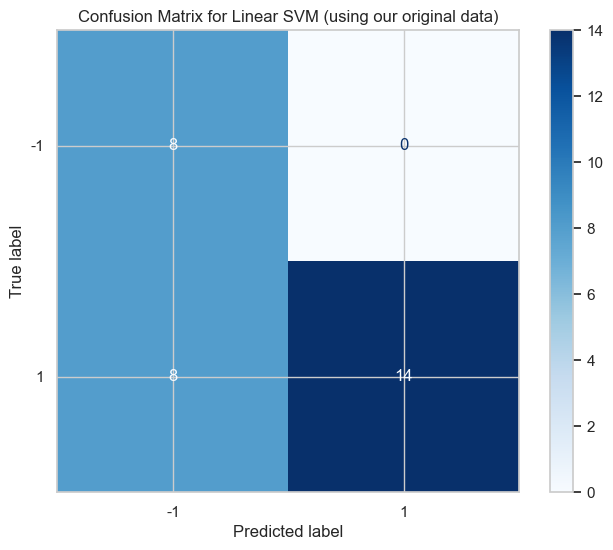

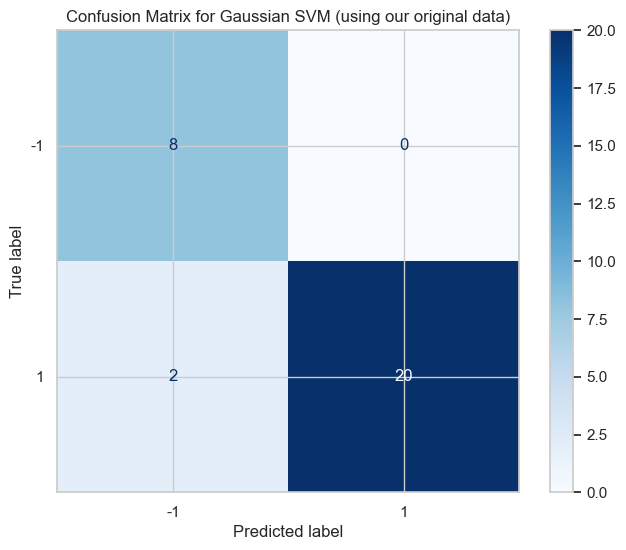

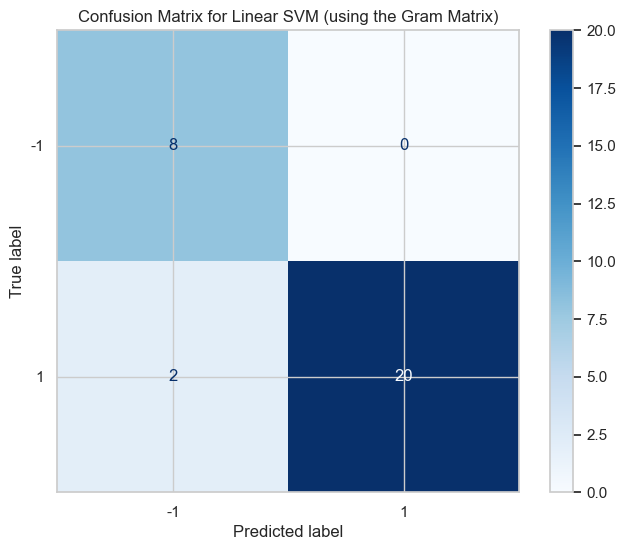

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# First : for linear SVM trained with original feature vectors
linear_conf_matrix = confusion_matrix(y_test, linear_svm.predict(X_test))
linear_disp = ConfusionMatrixDisplay(confusion_matrix=linear_conf_matrix, display_labels=linear_svm.classes_)
linear_disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix for Linear SVM (using our original data)')
plt.show()

# Second : for Gaussian SVM trained with original feature vectors
gaussian_conf_matrix = confusion_matrix(y_test, gaussian_svm.predict(X_test))
gaussian_disp = ConfusionMatrixDisplay(confusion_matrix=gaussian_conf_matrix, display_labels=gaussian_svm.classes_)
gaussian_disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix for Gaussian SVM (using our original data)')
plt.show()

# Third : for SVM trained with linear kernel using Gram matrix
linear_gram_conf_matrix = confusion_matrix(y_test, linear_svm_gram.predict(K_test)) #K_test instead of X_test here 
linear_gram_disp = ConfusionMatrixDisplay(confusion_matrix=linear_gram_conf_matrix, display_labels=linear_svm_gram.classes_)
linear_gram_disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix for Linear SVM (using the Gram Matrix)')
plt.show()


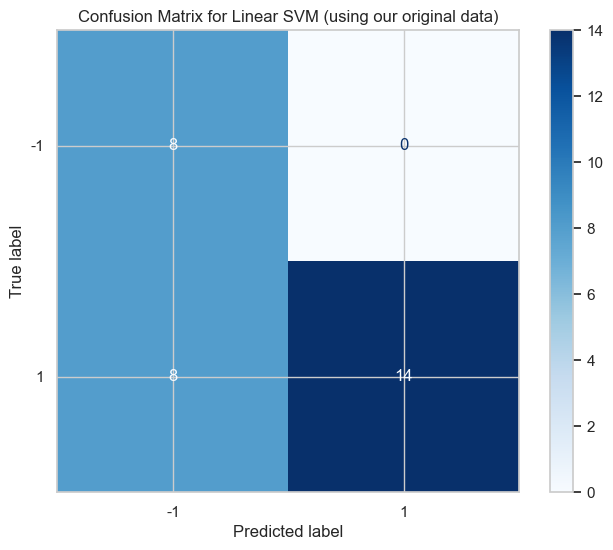

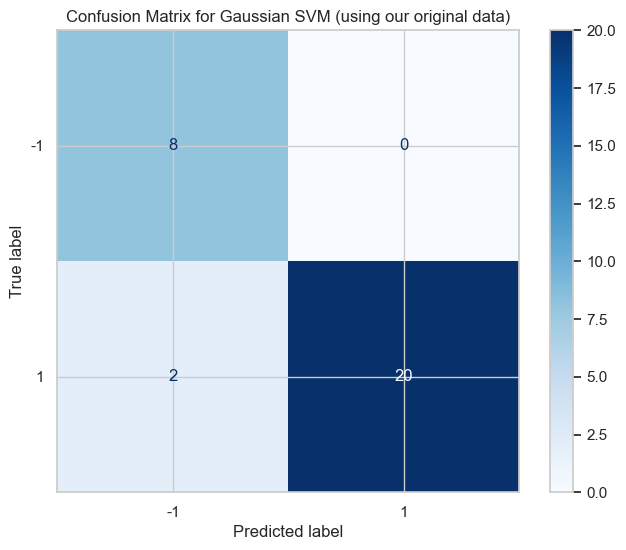

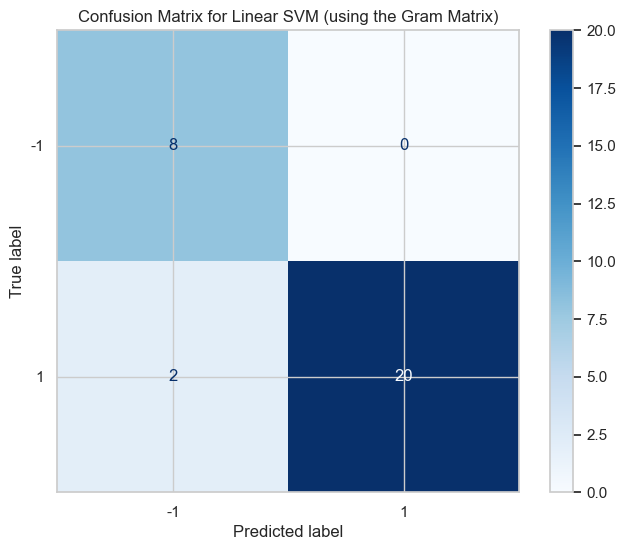

In [8]:
#Version 2 with for loop (but same idea)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

svm_models = [linear_svm, gaussian_svm, linear_svm_gram]
titles = ['Linear SVM (using our original data)', 'Gaussian SVM (using our original data)', 'Linear SVM (using the Gram Matrix)']

for svm_model, title in zip(svm_models,titles):
    final_title = "Confusion Matrix for " + title
    if "Gram" in title:
        conf_matrix = confusion_matrix(y_test, svm_model.predict(K_test))
    else:
        conf_matrix = confusion_matrix(y_test, svm_model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
    disp.plot(cmap='Blues', values_format='.0f')
    plt.title(final_title)
    plt.show()

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Use a contour plot to show the classification boundaries of your SVMs. [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

#### BONUS **[ZERO pt]** Learn to search for the best values for `gamma` and `C` [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) . NOTE: this is extremely valuable experience for when (not even if!) you will need a SVM for a real application.

#### BONUS **[ZERO pt]** Generate points to run through with a regression algorithm like Linear Regression from our earlier exercises. This time start from a nonlinear equation (e.g. $x^2$), and add noise as usual. Then try your hand with SVR with a (linear or) nonlinear kernel, which is equivalent to running Linear Regression on the Gram matrix (yet another name: Kernel Ridge Regression) [[link here]](https://scikit-learn.org/stable/modules/kernel_ridge.html).

### Final considerations

- I once read a quote that restricting calculus to linear functions is like restricting biology to the study of great apes (help tracking its origin would be welcome). We start from linearity because it's easier to study; the real world is rarely so kind, so learning adaptations such as the kernel trick is simply invaluable.
- Trying (scikit-learn) Naïve Bayes or Linear Discriminant Analysis on the Gram matrices would take you just a minute and be invaluable experience. For example, I wouldn't be surprised if LDA performed better than NB (think: why?). But if we had a very large dataset, the Gram matrix would become too large for LDA to handle (remember it does not scale well on the number of features).
- **[IMPORTANT]** If you want to gain first-hand experience in tools you can actually use in the real world, consider submitting on the bonus questions from this point on, as I am switching the topic from "topics for curiosity" to "actual deployed value".